In [222]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split

### Implement  a recommender system for the same MovieLens Dataset using Python.
Helpful Python coding/tutorials at the below links (use any one lib): 			[40 points]
- http://surpriselib.com/ 
- http://blog.chapagain.com.np/recommender-system-using-python-python-recsys/
- http://muricoca.github.io/crab/


Below is the implementation of the "suprise" python package, a scikit for building and analyzing recommender systems. 
I used the built in dataset which was the same one as the description in the homework. 

In [273]:
from surprise import SVD
from surprise import Dataset
from surprise import evaluate, print_perf

data = Dataset.load_builtin('ml-100k')
data.split(n_folds=5)

algo = SVD()

perf = evaluate(algo, data, measures=['RMSE', 'MAE'])

print_perf(perf)

Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.9348
MAE:  0.7377
------------
Fold 2
RMSE: 0.9316
MAE:  0.7356
------------
Fold 3
RMSE: 0.9459
MAE:  0.7442
------------
Fold 4
RMSE: 0.9381
MAE:  0.7388
------------
Fold 5
RMSE: 0.9336
MAE:  0.7354
------------
------------
Mean RMSE: 0.9368
Mean MAE : 0.7383
------------
------------
        Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    
RMSE    0.9348  0.9316  0.9459  0.9381  0.9336  0.9368  
MAE     0.7377  0.7356  0.7442  0.7388  0.7354  0.7383  


Given the RMSE, it seems like the predictor is not very good at all. However, after doing some external reading, I have found that accuracy may not be the best way to evaluate a reccomender system (although it is really the only way to valuate it), it should be noted that accuracy is able to tell if the recommender system is able to predict those items that you have already rated or interacted with, thus recommender systems which optimize accuracy will naturally place those items at the top of a user’s list.

## Keras Classifier on the Wine classification dataset

- http://archive.ics.uci.edu/ml/datasets/Wine                                                                       


In [231]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [223]:
url="http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine =pd.read_csv(url, header=None)

In [224]:
wine.columns = ['Wine Classifier',
'Alcohol',
'Malic acid',
'Ash',
'Alcalinity of ash', 
'Magnesium',
'Total phenols',
'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity',
'Hue',
'OD280/OD315 of diluted wines',
'Proline' ]

In [225]:
wine.head()

,Wine Classifier,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [226]:
wine["Wine Classifier"].value_counts()

2    71
1    59
3    48
Name: Wine Classifier, dtype: int64

Here is the break down of classes amongst the wine classifier to Alcohol content and Hue. It is interesting to see here that there are very clear clusters of data. 

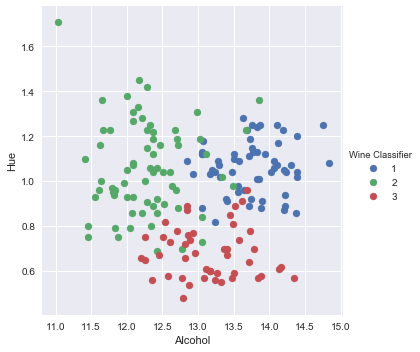

In [227]:
sns.FacetGrid(wine, hue="Wine Classifier", size=5) \
   .map(plt.scatter, "Alcohol", "Hue") \
   .add_legend()

In [228]:
data = wine #just making things easier later on

In [230]:
cols = data.columns
features = cols[1:14]
labels = cols[0]
print(features)
print(labels)

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')
Wine Classifier


In [232]:
seed = 7
numpy.random.seed(seed)

dataset = data
# split into input (X) and output (Y) variables
X = dataset[cols[1:14]]
Y = dataset[cols[0]]

Here I am splitting it into the dataset to the outcome, which is the wine class and the predictors/features, which is the rest of the dataset. 

In [233]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = np_utils.to_categorical(encoded_Y)

In [262]:
X_m = X.as_matrix()

In [264]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(26, input_dim=13, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

Below is where I am calling the Keras Classifier model. 

In [265]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [266]:
kfold = KFold(n_splits=2, shuffle=True, random_state=seed)

In [267]:
results = cross_val_score(estimator, X_m, dummy_y, cv=5)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 27.22% (38.98%)


The total classification error is 27.22%, which is fairly high given the dataset is not very complex. Perhaps it would be valuable to create engineer some features as to help the classifier identify classes. 